# Guía 3 ejercicio 11

## Samantha Kucher

## a) 

Sea $ x $ una variable aleatoria con distribución uniforme en [0,1]. Se define una nueva variable aleatoria $ y = e^x $ ($ 1 \leq y \leq e $).   
   
La función de distribución de $ x $ es, entonces, $ F_x (t) = t $, con $ 0 \leq t \leq 1$. Busco ahora la función de distribución de $ y $:   

<center>
$ F_y (t) = P(y \leq t) = P(e^x \leq t) = P(x \leq \ln (t) ) = F_x (\ln (t)) = \ln (t) $
</center></h1>
    
Al derivar $F_y (t) $ se obtiene la densidad de probabilidad de $ y $, siendo ésta $f_y (t)  = 1/t $.

In [38]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def fy(t):
    return 1.00/t
M = 10000000 #tomo muchos puntos para poder observar claramente si corresponde o no con la distribucion esperada
x = uniform.rvs(size=M) #numeros aleatorios con distribucion uniforme
y = np.exp(x)

Al aplicar la función $ y =  e^x $, genero números aleatorios con distribución $1/x $ a partir de números con distribución uniforme, como se muestra en el siguiente histograma.

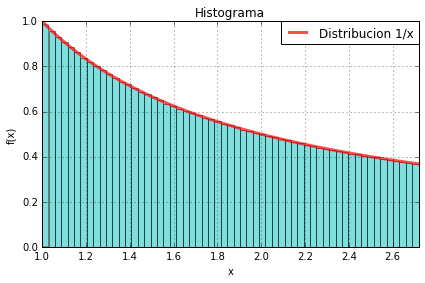

In [79]:
bines = np.linspace(1,np.e,60)
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(y, bins = bines, range=[0,np.e], color = 'c', alpha=0.5, normed=True, stacked=True)
plt.plot(bines,fy(bines), 'r-', lw = 3, alpha = 0.7, label = 'Distribucion 1/x')
ax.set_xlim([1,np.e])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Histograma')
ax.grid()
plt.legend(loc=1, borderaxespad=0.)
fig.tight_layout()
plt.show()

## b)

A partir de una distribución uniforme, busco generar números al azar con distribución exponencial. Es decir, busco $y = \phi(x) $ tal que $ F_y(t) = 1- e^{-\lambda t}$.   
   
<center>
$ F_y (t) = P(y \leq t ) = P(\phi (x) \leq t) = P(x \leq \phi^{-1}(t)) = F_x (\phi^{-1}(t)) = \phi^{-1}(t) $   
</center></h1>
   
Pido que $F_y (t) = 1- e^{-\lambda t}$. Utilizando la notación abreviada $F_y(t) \rightarrow F(y) $, esta igualdad se escribe como   
   
<center>
$ F(y) = \phi^{-1}(y) = 1- e^{-\lambda y}$   
</center></h1>
   
Teniendo en cuenta que $\phi^{-1}(y) = x $, se obtiene $y = -\frac{1}{\lambda}\ln(1-x)$.

In [70]:
g = 0.25
def fyb(t):
    return g*np.exp(-g*t)
Mb = 500 
xb = uniform.rvs(size=Mb) #numeros aleatorios con distribucion uniforme
yb = -(1/g)*np.log(1-xb)
L = 30 #hasta donde quiero mirar el histograma
puntos = np.linspace(0,L,300) #puntos para graficar la exponencial
binesb1 = np.arange(0,L,0.8) #bines del 1er histograma
equiesp = np.arange(0,15,0.8)
anchos = np.arange(15,L,2)
binesb2 = np.concatenate((equiesp,anchos), axis=0) #bines mas gruesos a partir del numero 15

El argumento  `normed ` de la función  `plt.histogram ` hace que la integral de del histograma esté normalizada a 1 (es decir, la suma de las áreas de cada bin). Si además tiene el argumento `stacked=True`, la suma de las alturas de los bines también estará normalizada a uno.

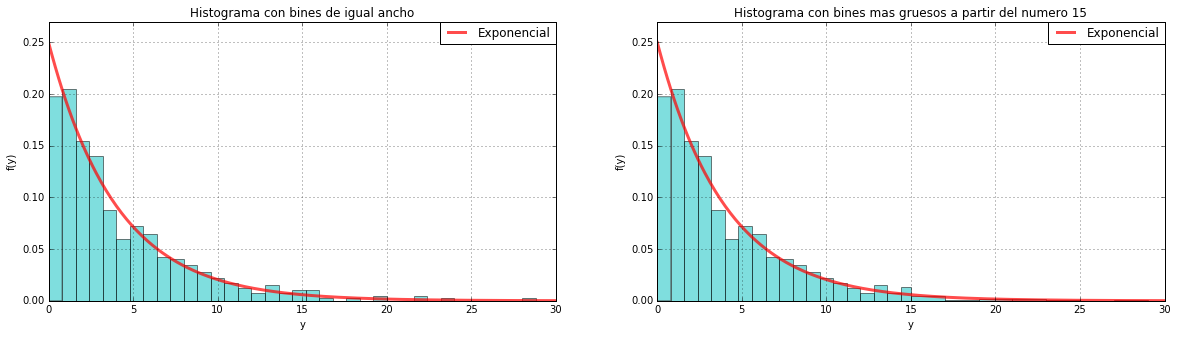

In [72]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

n, bins, patches = ax1.hist(yb, bins = binesb1, range=[0,L], color = 'c', alpha=0.5, normed=True, stacked=True)
ax1.plot(puntos,fyb(puntos), 'r-', lw = 3, alpha = 0.7, label = 'Exponencial')
ax1.set_xlim([0,L])
ax1.set_ylim([0,g+0.02])
ax1.set_xlabel('y')
ax1.set_ylabel('f(y)')
ax1.set_title('Histograma con bines de igual ancho')
ax1.legend(loc=1, borderaxespad=0.)
ax1.grid()

n, bins, patches = ax2.hist(yb, bins = binesb2, range=[0,L], color = 'c', alpha=0.5, normed=True, stacked=True)
ax2.plot(puntos,fyb(puntos), 'r-', lw = 3, alpha = 0.7, label = 'Exponencial') 
ax2.set_xlim([0,L])
ax2.set_ylim([0,g+0.02])
ax2.set_xlabel('y')
ax2.set_ylabel('f(y)')
ax2.set_title('Histograma con bines mas gruesos a partir del numero 15')
ax2.legend(loc=1, borderaxespad=0.)
ax2.grid()
